<a href="https://colab.research.google.com/github/KarenYu729/Pytorch-Note/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
from matplotlib import pyplot as plt

def plot_curve(data):
  fig = plt.figure()
  plt.plot(range(len(data)),data, color = 'blue')
  plt.legend(['value'],loc = 'upper right')
  plt.xlabel('step')
  plt.ylabel('value')
  plt.show

def plot_image(img, label, name):
  fig = plt.figure()
  for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(img[i][0]*0.3081+0.1307, cmap = 'gray', interpolation = 'none')
    plt.title("{}: {}".format(name, label[i].item()))
    plt.xticks([])
    plt.yticks([])
  plt.show()

def one_hot(label, depth = 10):
  out = torch.zeros(label.size(0), depth)
  idx = torch.LongTensor(label).view(-1, 1)
  out.scatter_(dim = 1, index = idx, value = 1)
  return out

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


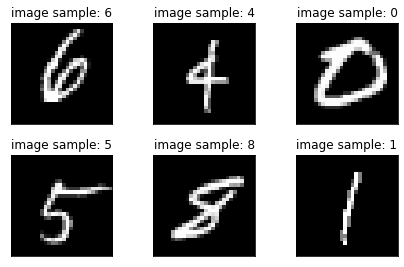

0 0 0.14826692640781403
0 10 0.09853707998991013
0 20 0.08539731800556183
0 30 0.07744663953781128
0 40 0.07367625087499619
0 50 0.06793159991502762
0 60 0.06578981131315231
0 70 0.06118093803524971
0 80 0.057859618216753006
0 90 0.05645290017127991
0 100 0.05286338925361633
0 110 0.052417587488889694
1 0 0.049122218042612076
1 10 0.04819664731621742
1 20 0.04864773154258728
1 30 0.04553698003292084
1 40 0.04569749906659126
1 50 0.04386007413268089
1 60 0.04506877437233925
1 70 0.043725065886974335
1 80 0.04220886155962944
1 90 0.04100506752729416
1 100 0.0418524369597435
1 110 0.040779996663331985
2 0 0.036124955862760544
2 10 0.038132019340991974
2 20 0.040083177387714386
2 30 0.03897039219737053
2 40 0.0350378155708313
2 50 0.036185234785079956
2 60 0.03363613784313202
2 70 0.03610364347696304
2 80 0.035195689648389816
2 90 0.03409384936094284
2 100 0.03437456861138344
2 110 0.03264865651726723
test acc: 0.8895


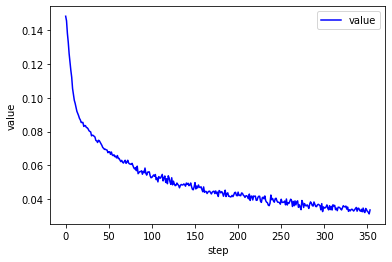

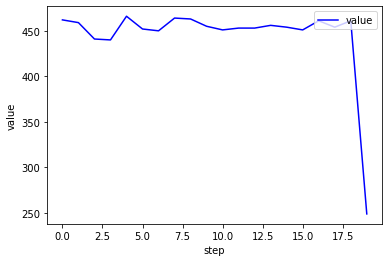

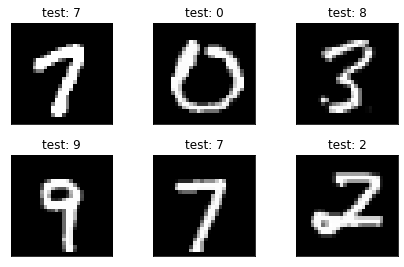

In [22]:
from torch.torch_version import TorchVersion
import torch
from torch.nn import functional as F
from torch import optim

import torchvision
from matplotlib import pyplot as plt


batch_size = 512

# step1 load dataset
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data', train=True, download=True, 
                               transform=torchvision.transforms.Compose([
                                torchvision.transforms.ToTensor(), \
                                torchvision.transforms.Normalize( (0.1307,), (0.3081,) )                                         
                               ])
                               ),
  batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data/', train=False, download=True, 
                               transform=torchvision.transforms.Compose([
                                    torchvision.transforms.ToTensor(), \
                                    torchvision.transforms.Normalize( (0.1307,),(0.3081,) )
                               ])),
  batch_size=batch_size, shuffle=True)

x, y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())

plot_image(x, y, 'image sample')

class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    # xw+b
    self.fc1 = torch.nn.Linear(28*28, 256)
    self.fc2 = torch.nn.Linear(256, 64)
    self.fc3 = torch.nn.Linear(64, 10)

  def forward(self, x):
    # h1 = relu(xw1+b1)
    x = F.relu(self.fc1(x))
    # h2 = relu(h1w1+b2)
    x = F.relu(self.fc2(x))

    x = self.fc3(x)

    return x

net = Net()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)
train_loss = []

for epoch in range(3):
  for batch_idx, (x, y) in enumerate(train_loader):
    x = x.view(x.size(0), 28*28)

    out = net(x)
    y_onehot = one_hot(y)
# loss = mse(out, y_onehot)
    loss = F.mse_loss(out, y_onehot)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    if batch_idx%10 == 0:
      print(epoch, batch_idx, loss.item())

plot_curve(train_loss)
total_correct = 0
test_accur = []
for x,y in test_loader:
  x = x.view(x.size(0),28*28)
  out = net(x)
  pred = out.argmax(dim=1)
  correct = pred.eq(y).sum().float().item()
  total_correct += correct
  test_accur.append(correct)

plot_curve(test_accur)
total_num = len(test_loader.dataset)
acc = total_correct/total_num
print('test acc:', acc)

x, y  = next(iter(test_loader))
out = net(x.view(x.size(0), 28*28))
pred = out.argmax(dim = 1)
plot_image(x,pred, 'test')



In [ ]:
# Note

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data', train=True, download=True, 
                               transform=torchvision.transforms.Compose([
                                torchvision.transforms.ToTensor(), \
                                torchvision.transforms.Normalize( (0.1307,), (0.3081,) ) # distribute around 0                                         
                               ])
                               ),
  batch_size = batch_size, shuffle = True)
#**********
torch.utils.data.DataLoader
#**********
# build-in dataset
# All datasets are subclasses of torch.utils.data.Dataset
# eg
imagenet_data = torchvision.datasets.ImageNet('path/to/imagenet_root/')
data_loader = torch.utils.data.DataLoader(imagenet_data,
                        batch_size=4,
                        shuffle=True,
                        num_workers=args.nThreads)

"""
torchvision.datasets.MNIST
root (string) – Root directory of dataset where 
KMNIST/raw/train-images-idx3-ubyte and KMNIST/raw/t10k-images-idx3-ubyte exist.

train (bool, optional) – If True, creates dataset from train-images-idx3-ubyte, 
otherwise from t10k-images-idx3-ubyte.

download (bool, optional) – If True, downloads the dataset from the internet and puts it in root directory. 
If dataset is already downloaded, it is not downloaded again.

transform (callable, optional) – A function/transform that takes in an PIL image and returns a transformed version. 
E.g, transforms.RandomCrop

target_transform (callable, optional) – A function/transform that takes in the target and transforms it.
"""
#*******************
optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)
#*******************
# To use torch.optim you have to construct an optimizer object, 
# that will hold the current state and will update the parameters 
# based on the computed gradients.

# To construct an Optimizer you have to give it an iterable 
# containing the parameters (all should be Variable s) to optimize. 
# Then, you can specify optimizer-specific options such as the learning rate, 
# weight decay, etc.
"""
params (iterable) – iterable of parameters to optimize or dicts defining parameter groups

lr (float) – learning rate

momentum (float, optional) – momentum factor (default: 0)

weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

dampening (float, optional) – dampening for momentum (default: 0)

nesterov (bool, optional) – enables Nesterov momentum (default: False)

maximize (bool, optional) – maximize the params based on the objective, instead of minimizing (default: False)
"""

0 0 0.032545071095228195
0 10 0.03321918100118637
0 20 0.029322803020477295
0 30 0.02678925357758999
0 40 0.023932913318276405
0 50 0.022275030612945557
0 60 0.025223921984434128
0 70 0.02161276899278164
0 80 0.020517732948064804
0 90 0.019488757476210594
0 100 0.021853217855095863
0 110 0.017771627753973007
1 0 0.017455169931054115
1 10 0.01828419603407383
1 20 0.018603987991809845
1 30 0.01570950634777546
1 40 0.016463998705148697
1 50 0.014891676604747772
1 60 0.01608586683869362
1 70 0.014804350212216377
1 80 0.014552218839526176
1 90 0.01539911050349474
1 100 0.014932108111679554
1 110 0.01634651981294155
2 0 0.013875795528292656
2 10 0.01311594806611538
2 20 0.013762211427092552
2 30 0.013223240152001381
2 40 0.014834160916507244
2 50 0.011163509450852871
2 60 0.012374745681881905
2 70 0.01358075626194477
2 80 0.010796332731842995
2 90 0.011488767340779305
2 100 0.013630482368171215
2 110 0.014408799819648266
test acc: 0.9573


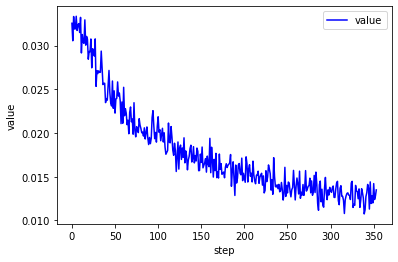

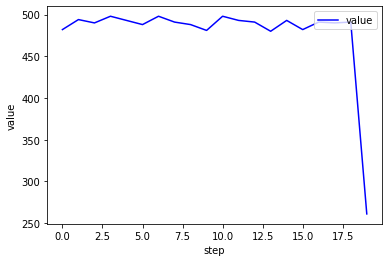

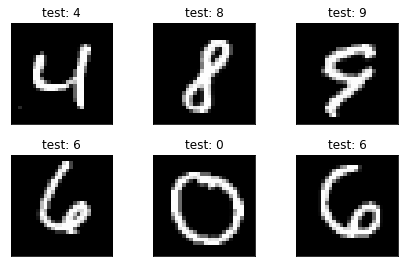

In [23]:
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.9)# 
train_loss = []

for epoch in range(3):
  for batch_idx, (x, y) in enumerate(train_loader):
    x = x.view(x.size(0), 28*28)

    out = net(x)
    y_onehot = one_hot(y)
# loss = mse(out, y_onehot)
    loss = F.mse_loss(out, y_onehot)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    if batch_idx%10 == 0:
      print(epoch, batch_idx, loss.item())

plot_curve(train_loss)
total_correct = 0
test_accur = []
for x,y in test_loader:
  x = x.view(x.size(0),28*28)
  out = net(x)
  pred = out.argmax(dim=1)
  correct = pred.eq(y).sum().float().item()
  total_correct += correct
  test_accur.append(correct)

plot_curve(test_accur)
total_num = len(test_loader.dataset)
acc = total_correct/total_num
print('test acc:', acc)

x, y  = next(iter(test_loader))
out = net(x.view(x.size(0), 28*28))
pred = out.argmax(dim = 1)
plot_image(x,pred, 'test')
